# The Locomotive Problem

"A railroad numbers its locomotives in order of 1 to N. One day you see one with the number 60. Estimate how many locomotives the railroad has."

It should be noted that this would baffle most frequentist statisticians, which require many observations in order to converge on good estimates. This is a good example of where Bayesian statistics shines.

Note that my naive solution was 180, this was because if there already exist 60 then there's a possibility that it will be at least 60 more. This also somehow adds up with intution. (Though it is a really naive approach.)

In [1]:
import numpy as np
from thinkbayes2 import Suite, Pmf
from dice import Dice
import matplotlib.pyplot as plt


plt.style.use("seaborn")

%matplotlib inline

Step one is to find a number of hypotheses we are willing to test. Let's say there are between 1 and 1000 trains...

In [2]:
hypos = range(1, 1001)

Next, we need to design our suite

In [3]:
class Train(Suite):
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

This is similar to the dice problem before, if we observe a train of 60 then the hypothesis that there are only 59 or fewer trains is impossible.

Furthermore, for each number after 59, the probability of seeing that train is 1/60, and so that is the probability we return.

In [4]:
suite = Train(hypos)
suite.Update(60);

In [5]:
x = []
y = []

for hypothesis, probability in suite.Items():
    x.append(hypothesis)
    y.append(probability)

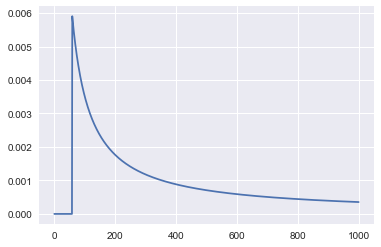

In [6]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.plot(x, y)
plt.show()

By the logic we defined in the suite, although it seems counter intuitive, the number of likely trains in this company is actually 60, but that doesn't jive well with intuition.

But maybe we want to rather find the mean of this distribution.

In [7]:
suite.Mean()

333.41989326371095

If we wanted to minimize error then it would be best to quote this value above of 333 if you had to guess multiple times.

## What about the prior?

Here we made the assumption that there were a maximum of 1000 locomotives, but this may or may not be true.

Note that we used a uniform prior to come to our conclusion. However, the number of companies that actually have that many trains falls off exponentially and we should model our distribution as such.

Note that the mean shown above of 333, changes depending on where your upper limit is. So it's not necessarily a good number to quote in itself either.

In [8]:
class Train2(Dice):
    def __init__(self, hypos, alpha=1.0):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, hypo**(-alpha))
        self.Normalize()
    
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

In [9]:
for i in [501,1001,2001]:
    hypos = range(1, i)
    suite2 = Train2(hypos)
    suite2.Update(60);
    print(suite2.Mean())

143.81231982097896
178.54735317971574
215.56892550615513


We can see here that with an exponential fall off in our prior, we can reach a mean of between 131 and 134

This is fortunate because it means that my initial guess of 120 wasn't too bad!

## Credible Intervals

We can even estimate the error in our estimation by using credible intervals. (Not the same as confidence intervals from frequentist statistics.) We want to find two values such that there's a 90% chance that the unknown value falls between them. 

In [10]:
def Percentile(pmf, percentage):
    p = percentage/100
    total = 0
    for val, prob in pmf.Items():
        total += prob
        if total >= p:
            return val

In [11]:
interval = Percentile(suite2, 5), Percentile(suite2, 95)
print(interval)

(63, 760)
